In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [31]:
df = pd.read_csv("Mall_Customers.csv")
display(df.head())
display(df.corr(numeric_only=True))

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


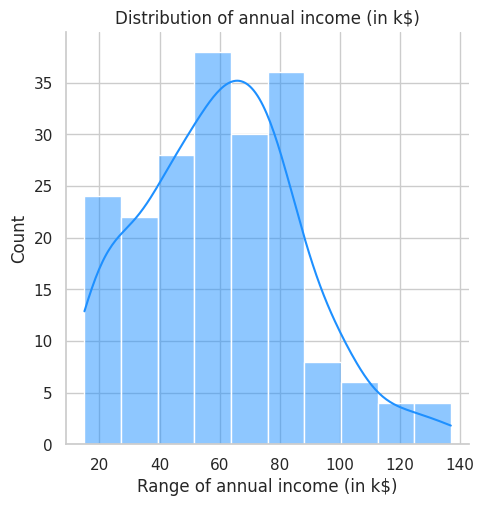

In [32]:
sns.set(style="whitegrid")
sns.displot(df["Annual Income (k$)"], kde=True, color="dodgerblue")
plt.title("Distribution of annual income (in k$)")
plt.xlabel("Range of annual income (in k$)")
plt.ylabel("Count")
plt.show()

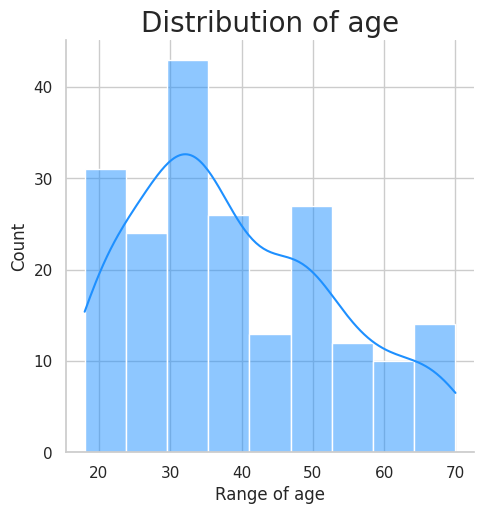

In [33]:
sns.set(style="whitegrid")
sns.displot(df["Age"], kde=True, color="dodgerblue")
plt.title('Distribution of age', fontsize = 20)
plt.xlabel('Range of age')
plt.ylabel('Count')
plt.show()

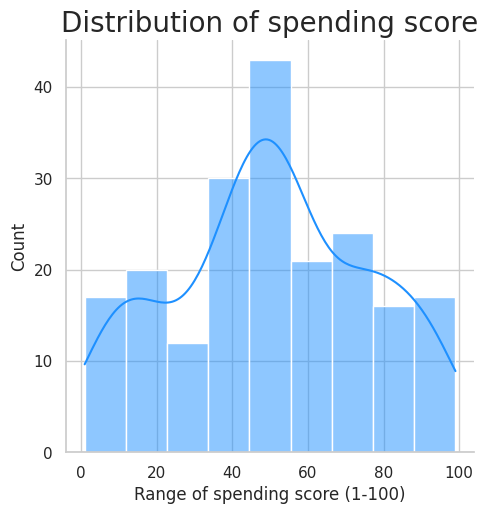

In [34]:
sns.set(style="whitegrid")
sns.displot(df["Spending Score (1-100)"], kde=True, color="dodgerblue")
plt.title('Distribution of spending score', fontsize = 20)
plt.xlabel('Range of spending score (1-100)')
plt.ylabel('Count')
plt.show()

<ipython-input-35-676bd6c2b1b1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genders.index, y=genders.values, palette=colors)


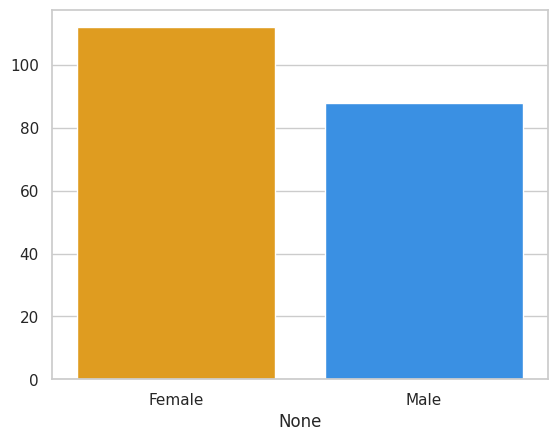

In [35]:
genders = df["Gender"].value_counts()
colors = {
    "Male": "dodgerblue",
    "Female": "orange"
}
sns.set(style="whitegrid")
sns.barplot(x=genders.index, y=genders.values, palette=colors)
plt.show()

In [36]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


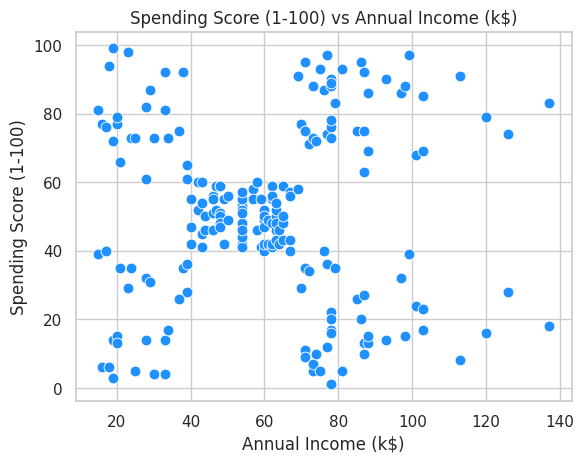

In [37]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=X, s=60, color="dodgerblue")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

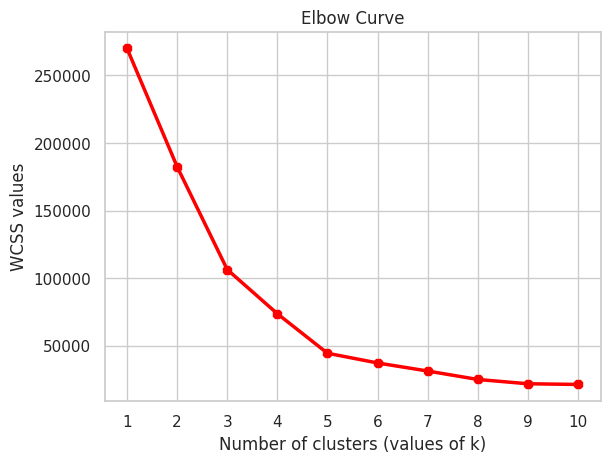

In [38]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X)
    wcss.append(k_means.inertia_)

plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")
plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [39]:
k_means_1 = KMeans(n_clusters=5, n_init="auto")
k_means_1.fit(X)
y_pred = k_means_1.predict(X)
df["label"] = y_pred
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


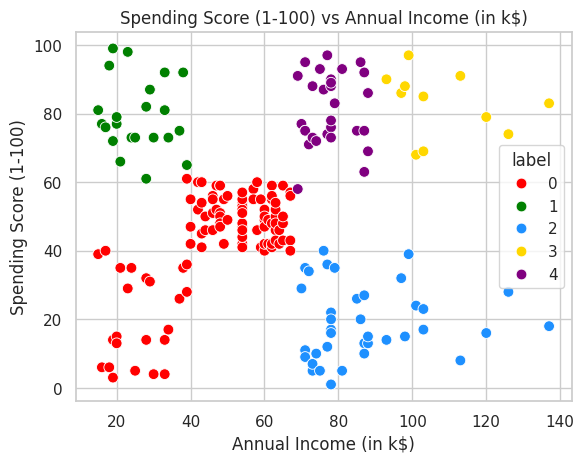

In [40]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="label",
    palette=colors,
    legend="full",
    data=df,
    s=60
)
plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()